# Tareas de los videos semana 2 

### 04_missing_values 
### Exercises:  
    - Create a new column called "TA_DIC_ratio" that is the ratio of TA to DIC
    - Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season
    - Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season and area
    - Save the results to an Excel file called "TA_DIC_Season_Areas.xlsx"


## **Primer ejercicio**

#### 1. Importamos y verificamos la base de datos

In [3]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [4]:
# Path to the file to be imported
path = "Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
CO2Data = import_csv(path)

In [18]:
CO2Data.head()  # Display the first few rows of the DataFrame

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0


#### 2. Creamos la nueva columna y verificamos.

In [ ]:
CO2Data["TA_DIC_RATIO"] = CO2Data["ta_micromol_kg"] / CO2Data["dic_micromol_kg"]  # Create the new column

In [ ]:
TA_DIC_RATIO = CO2Data["TA_DIC_RATIO"]

In [ ]:
TA_DIC_RATIO.head()  # Display the first few rows of the new column

#### Segunda actividad.

In [ ]:
season_stats = CO2Data.groupby("season")["TA_DIC_RATIO"].agg(["mean", "std"])

In [ ]:
season_stats.head()  # Display the first few rows of the season statistics

#### Tercera actividad.

In [ ]:
season_area_stats = CO2Data.groupby(["season", "area"])["TA_DIC_RATIO"].agg(["mean", "std"]).reset_index()


In [ ]:
season_area_stats.head()  # Display the first few rows of the season statistics

#### Cuarta actividad.

In [ ]:
season_area_stats.to_csv ("TA_DIC_Season_Area.csv", index=False)  # Save the season statistics to a CSV file

### Dejar cifras significativas y dar formato


In [ ]:
### POR EL MOMENTO NO SIRVE ###

# Asignar nombres de columnas adecuados

season_area_stats.columns = ['season', 'area'] + [f"{var}_{stat}" for var in TA_DIC_RATIO for stat in ['mean', 'std']]

#Formatear los valores para mostrar "media ± desviación estándar" sin notación científica y con dos cifras decimales
for var in TA_DIC_RATIO:
    mean_col = f"{var}_mean"
    std_col = f"{var}_std"
    season_area_stats[f"{var}_formatted"] = season_area_stats.apply(lambda row: f"{row[mean_col]:,.2f} ± {row[std_col]:,.2f}", axis=1)

 #Seleccionar solo las columnas formateadas junto con los índices
formatted_result = season_area_stats[['season', 'area'] + [f"{var}_formatted" for var in TA_DIC_RATIO]]

# Formatear valores "media ± desviación estándar"
season_area_stats["formatted"] = season_area_stats.apply(
    lambda row: f"{row['mean']:.2f} ± {row['std']:.2f}", axis=1)



# **Segundo ejercicio.**
### 06_plot_descriptive_statistics_matplotib

#### - **Plot histogram of DIC and TA**

In [1]:
import matplotlib.pyplot as plt

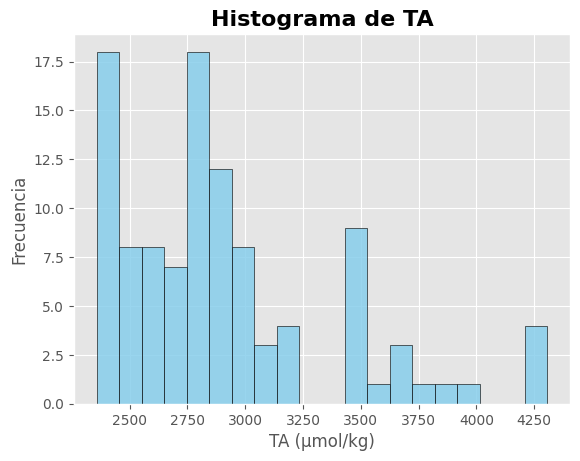

In [20]:
#Seleccionamos la data
TA_DATA = CO2Data["ta_micromol_kg"]
#Creamos el histograma de TA
plt.hist(TA_DATA, bins=20, 
         edgecolor='black',
         color='skyblue',
         alpha=0.85)
plt.xlabel("TA (µmol/kg)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Histograma de TA", fontsize=16, fontweight='bold')
plt.show()



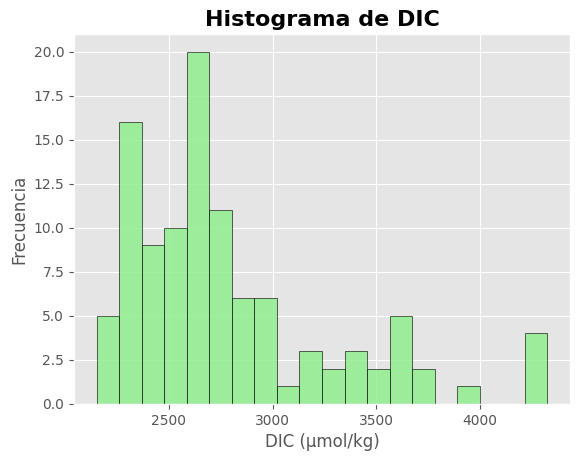

In [19]:
#Creamos el histograma de DIC
DIC_DATA = CO2Data["dic_micromol_kg"]
plt.hist(DIC_DATA, bins=20, 
         edgecolor='black'
         ,color='lightgreen',
         alpha=0.85)
plt.xlabel("DIC (µmol/kg)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Histograma de DIC", fontsize=16, fontweight='bold')
plt.show()

# **Tercer ejercicio**

### 07_plot_descriptive_statistics_seaborn
##### - How can you modify the units of the figures?  
##### - Check the examples at https://seaborn.pydata.org/ and create your own figures. If possible, use your own data.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

#create your own color array (viridis)
my_colors = ["#bec95e", "#643b8b"]

# add color array to set_palette
sns.set(font_scale=2, style="ticks", palette= my_colors)

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3174/2082436915.py:6: SyntaxWarning: invalid escape sequence '\m'
  ax.set(xlabel='Salinity (PSU)', ylabel=' DIC ($\mu mol \; kg^{-1}$)')


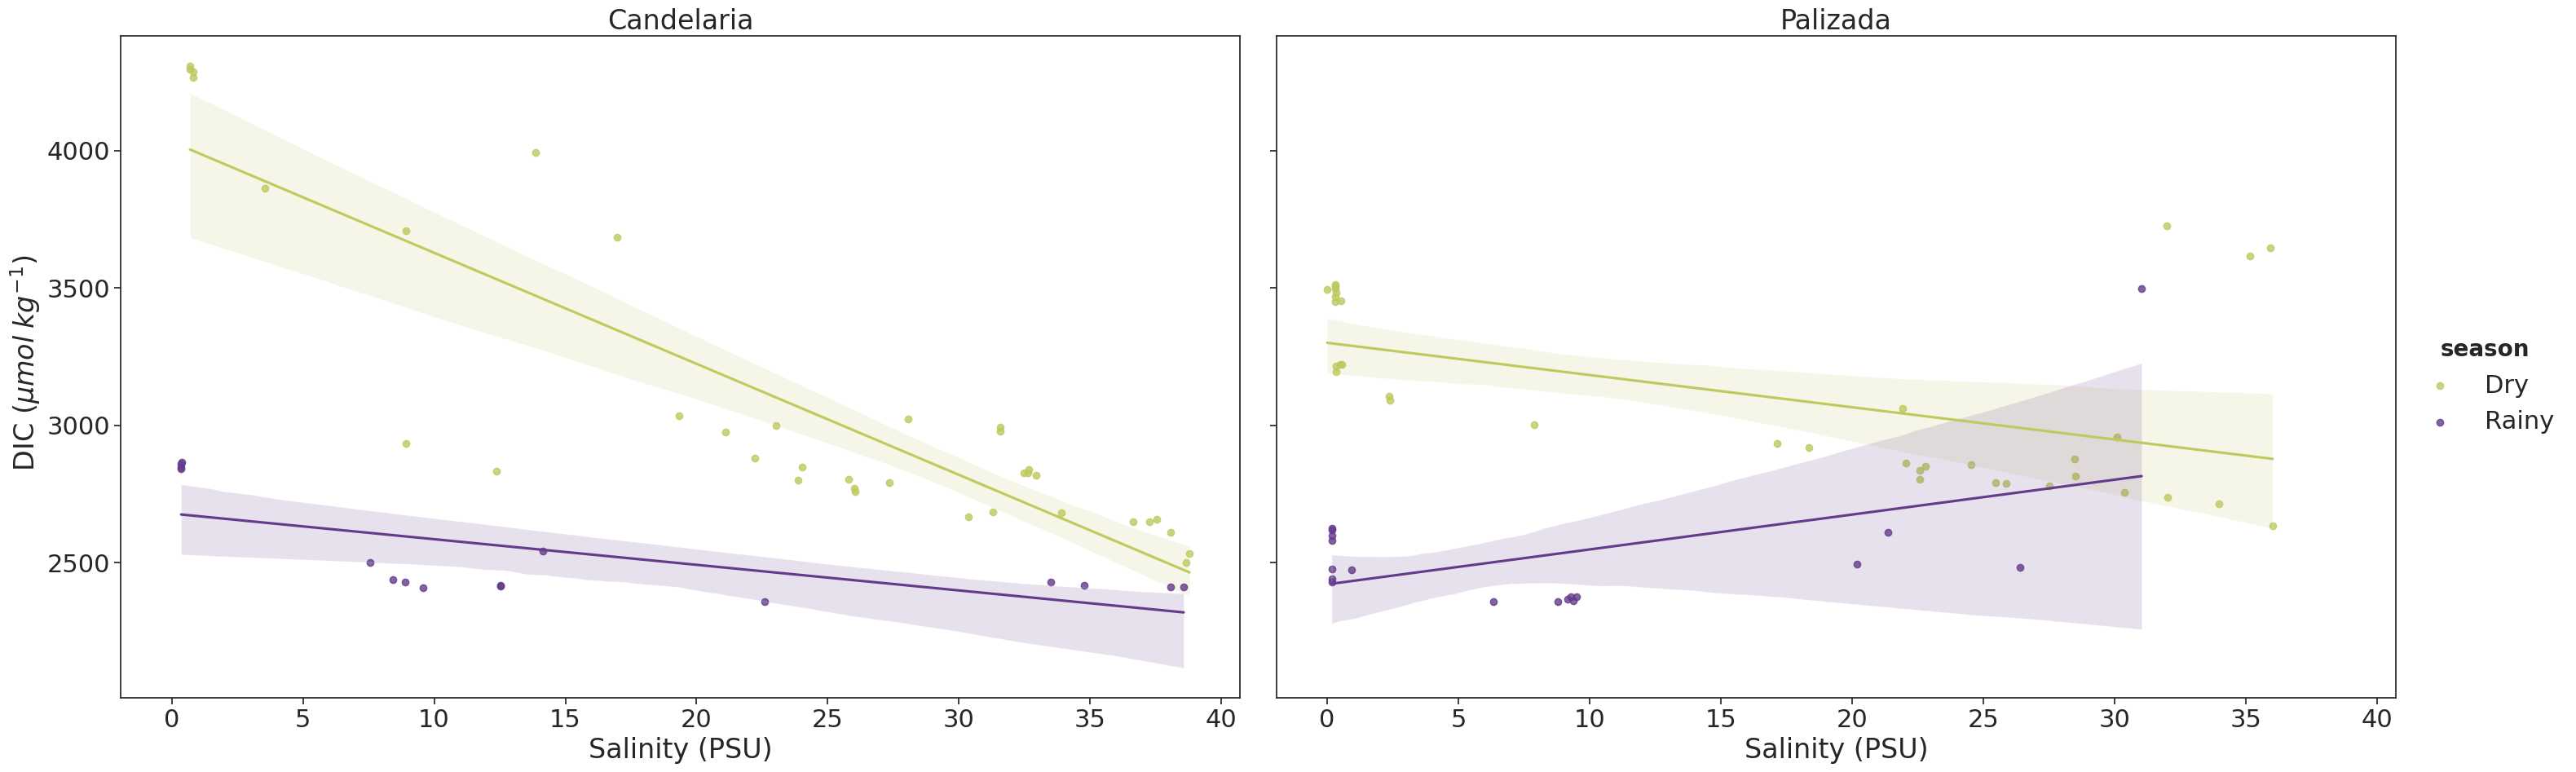

In [16]:

ax = sns.lmplot(x="sal_psu", y="ta_micromol_kg",
                hue="season",col="estuary",
                data=CO2Data, 
                height=10, aspect=1.5)

ax.set(xlabel='Salinity (PSU)', ylabel=' DIC ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20, fontweight='bold') # for legend title

sns.despine(top=False,right=False)

plt.show()

# **Cuarto ejercicio.**
### 08_normality_tests
#### - Respond to the following question: When is it appropriate to use the Kolmogorov-Smirnov test instead of the Shapiro-Wilk test?
#### - Based on the previous answer, perform the appropriate test to assess normality in the DIC (Dissolved Inorganic Carbon) and Salinity datasets.

## **RESPUESTA:**
#### Se usa Shapiro-Wilk test cuando la muestra es pequeña o mediana (n<2000) debido a su potencia estadistica para detectar desviaciones a la normalidad, por otro lado, se prefiere usar Kolmogorov-Smirnov test para muestras muy grandes o cuando se quiere conparar con una distribución específica teórica; aunque en la practica casi siempre se usa Shapiro-Wilk. 

In [23]:

from scipy.stats import shapiro

dic = CO2Data['dic_micromol_kg']

stat, p = shapiro(dic)
print(f'Estadístico= {stat:.5f}, p-valor= {p:.5f}')
if p > 0.05:
    print("La distribución es normal (no se rechaza H0)")
else:
    print("La distribución NO es normal (se rechaza H0)")

Estadístico= 0.85997, p-valor= 0.00000
La distribución NO es normal (se rechaza H0)


# Quinto ejercicio.
### 09_NonParametric_Mann_whitney
#### - Evaluate the Mann-Whitney U test for DIC and temperatura. Create boxplots and violin plots for these analyses.